This assignment represents my own work. I did not work on this assignment with others. All coding was done by myself.

I understand that if I struggle with this assignment that I will reevaluate whether this is the correct class for me to take. I understand that the homework only gets harder.

# CS 671: Homework 1
### Alex Kumar

### Question 3

In [44]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Define global variables
DATA = np.array([[20, 1, 0, 20, 0],
                [18, 1, 1, 33, 0],
                [11, 0, 1, 21, 1],
                [31, 0, 0, 18, 1],
                [19, 1, 1, 7, 1],
                [21, 1, 0, 10, 0],
                [44, 1, 0, 23, 1],
                [15, 1, 1, 16, 0],
                [16, 0, 1, 15, 1],
                [17, 1, 0, 6, 0]])
COEF = np.array([0.05, -3, 2.1, 0.008])
K = 0.3

In [46]:
# Base functions
def g(x): 
    return np.dot(COEF, x) + K

def f(x):
    return np.tanh(g(x))

In [47]:
# Data Helper Functions

# Calculate data values
def getData():
    gs, fs, ys = [], [], []
    for x in DATA:
        ys.append(x[-1])
        gs.append(round(g(x[:-1]), 3))
        fs.append(round(f(x[:-1]), 3))
    return gs, fs, ys

# Make matrix with function and y values
def makePairs(x, y):
    x, y = np.vstack(x), np.vstack(y)
    return np.concatenate((x, y), axis=1)

# Sort A by f(x) values
def sorted(a):
    temp = a.view(np.ndarray)
    a_sort = temp[np.lexsort((temp[:, 0],))]
    return a_sort, a_sort[:, 0]

In [48]:
# Threshold Helper Functions

# Return list of thresholds to iterate over
def makeThresh(thresh):
    thresh = np.insert(thresh, 0, thresh[0]-1)
    thresh = np.insert(thresh, len(thresh), thresh[-1]+1)
    return thresh

# Calculate misclassification error for each thresh over the sorted dat
def find_best(a, thresh): 
    error, total = [], len(a[:,1])
    for t in thresh:
        misclass = 0
        for x in a:
            if x[0] >= t:       # class pos
                if x[1] != 1:   misclass += 1
            else:               # class neg
                if x[1] != 0:   misclass += 1
        error.append(misclass/total)
    return np.concatenate((np.vstack(thresh), np.vstack(error)), axis=1)

# Find threshold(s) with lowest misclassification error
def find_min(a):
    curr_min, best = 1, []
    for x in a:
        if x[1] < curr_min:
            curr_min = x[1]
            best = [x[0]]
        elif x[1] == curr_min:
            best.append(x[0])     
    return best, curr_min

In [49]:
# Evalutation Helper Functions

# Calculate confusion matrix for best threshold(s)
def confusionMatrix(a, t):
    confusion = [0, 0, 0, 0]    # [TP, FP, FN, TN]
    for x in a:
        if x[0] >= t:       # class pos
                if x[1] != 1:   confusion[1] += 1   # FP
                else:           confusion[0] += 1   # TP
        else:               # class neg
            if x[1] != 0:       confusion[2] += 1   # FN
            else:               confusion[3] += 1   # TN
    return confusion

# Precision
def calcPrecision(c):
    return c[0] / (c[0] + c[1])     # [TP, FP, FN, TN]

# Recall
def calcRecall(c):
    return c[0] / (c[0] + c[2])

# F1
def calcF1(c):
    p = calcPrecision(c)
    r = calcRecall(c)
    return 2 * ((p * r) / (p + r))

In [50]:
# ROC Helper Functions

# Find TPR and FPR for each threshold
def findRates(a, thresh):
    tprs, fprs = [], []
    for t in thresh:
        confusion = confusionMatrix(a, t)
        tprs.append(calcRecall(confusion))
        fprs.append(confusion[1] / (confusion[1] + confusion[3])) 
    return np.concatenate((np.vstack(thresh), np.vstack(tprs), np.vstack(fprs)), axis=1)

# Generate ROC Curve
def makeROC(rates, min_ts):
    plt.plot(rates[:, 2], rates[:, 1], "-o")
    for p in rates:
        if p[0] in min_ts:
            plt.plot(p[2], p[1], "ro")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    return 

In [51]:
# Subroutine that runs for g(x) and f(x)
def subroutine(x, y):
    xy = makePairs(x, y)                            # prep data
    x_sort, x_thresh = sorted(xy)                   # sort data
    x_thresh = makeThresh(x_thresh)                 # make thresholds
    x_error = find_best(x_sort, x_thresh)           # get misclass error forall t
    x_min, min_val = find_min(x_error)              # find best t's
    print("Min thresh: ", x_min, "---> @ error of: ", min_val)

    c_matrix = confusionMatrix(x_sort, x_min[0])    # ex confus matrix
    precision = calcPrecision(c_matrix)             
    recall = calcRecall(c_matrix)
    f1 = calcF1(c_matrix)
    print("[TP, FP, FN, TN]: ", c_matrix)
    print("Precision: ", round(precision, 3), "  |  Recall: ", round(recall, 3), "  |  F1: ", round(f1, 3), "\n")

    roc_matrix = findRates(x_sort, x_thresh)        # tpr and fpr forall t
    makeROC(roc_matrix, x_min)
    return


 G time!
Min thresh:  [-0.316, 0.406, 1.994] ---> @ error of:  0.2
[TP, FP, FN, TN]:  [5, 2, 0, 3]
Precision:  0.714   |  Recall:  1.0   |  F1:  0.833 



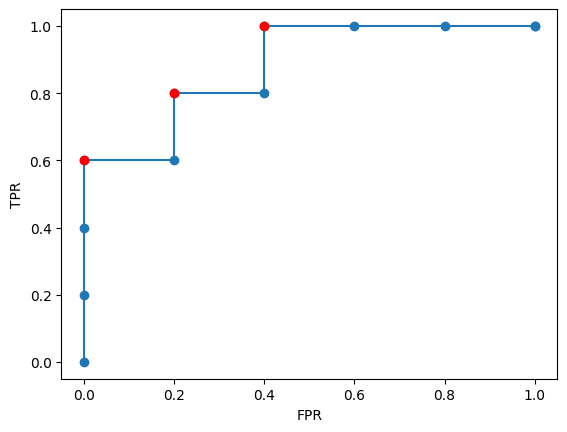


 F time!
Min thresh:  [-0.306, 0.385, 0.964] ---> @ error of:  0.2
[TP, FP, FN, TN]:  [5, 2, 0, 3]
Precision:  0.714   |  Recall:  1.0   |  F1:  0.833 



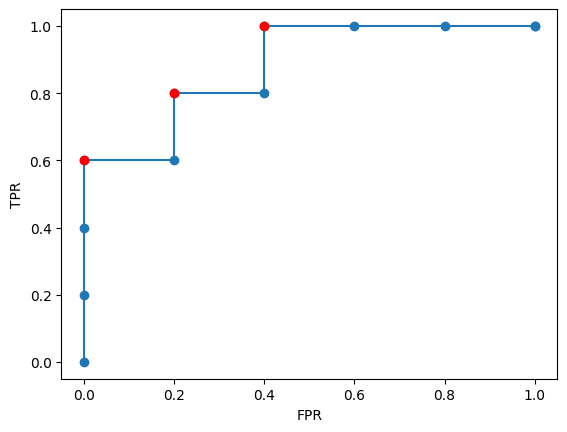

In [52]:
# Main function
def main():
    gs, fs, ys = getData()
    print("\n G time!")
    subroutine(gs, ys)
    print("\n F time!")
    subroutine(fs, ys)
    return

# Run main
if __name__ == "__main__":
    main()